## Bayesian Anlaysis

A drug company would like to introduce a drug to help patients with Alzheimer's. It is desirable to estimate $θ$, the proportion of the market share that this drug will capture.
- The company interviews 100 people and 15 of them say that they will buy the drug. (This the observed data: n=100, observed=15) $->$ likelihood
- If in the past new drugs tend to capture a proportion between say .10 and .40 of the market, and if all values in between are assumed equally likely, then $θ ∼ Unif(0.10, 0.40)$ $->$ prior

### Finding the traceplot of $\theta$ using Bayesian analysis to estimate the market share for the new drug?
- Sample 10000 draws
- Plot the traceplot

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

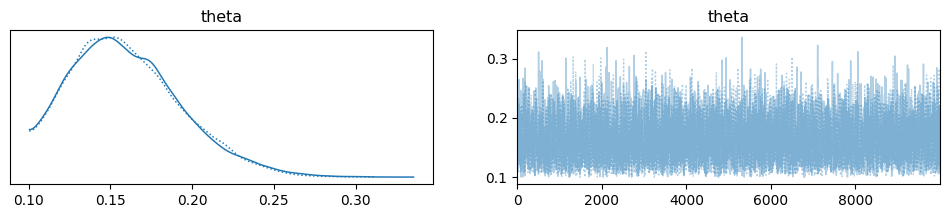

In [3]:
#  the defined values  are
observed = 15
total_population = 100

# declaring lower and upper prior values
lower_prior = 0.10
upper_prior = 0.40

# Bayesian model
with pm.Model() as model:
    theta = pm.Uniform('theta', lower=lower_prior, upper=upper_prior)
    likelihood = pm.Binomial('likelihood', n=total_population, p=theta, observed=observed)
    trace = pm.sample(10000, tune=1000, chains=2)

# trace plot plotting
az.plot_trace(trace)
plt.show()

### Plot the posterior distribution plot of $ \theta $
- Finidng the mean posterior value?

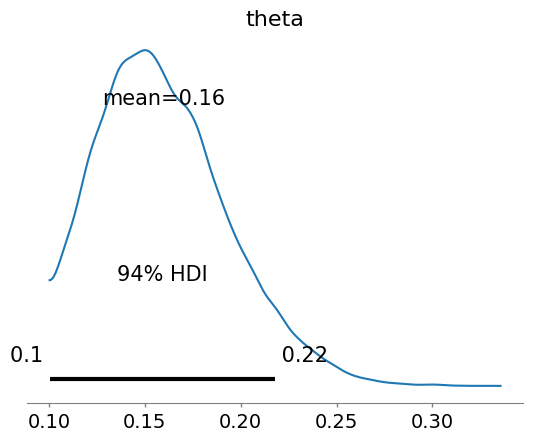

In [4]:
# Plotting posterior distribution
az.plot_posterior(trace)
plt.show()


## Bayesian Network Analysis

In this part I am analyzing medical diagnosis using Bayes Nets. The structure and the Conditional Probabability Distribution tables are shown in the figure below.

![MedicalDiagnosis](Med-diag-bnet.jpg)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [5]:
import pandas as pd
import seaborn as sns
from sklearn import metrics

In [6]:
pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [7]:
import pgmpy
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

**Define the model structure.**

In [8]:
model = BayesianModel([('Smokes', 'LungDisease'),
 ('LungDisease', 'ShortnessOfBreath'),
  ('LungDisease', 'ChestPain'),
   ('LungDisease', 'Cough'),
    ('Cold', 'Cough'),
     ('Cold', 'Fever')])

## Individual CPDs
- Define the CPDs using the state names of the variables.

In [9]:
### cpd for smokes
cpd_Smokes = TabularCPD(variable='Smokes', variable_card=2, values=[[0.2], [0.8]],
                        state_names={'Smokes' : ['T', 'F']})


## cpd for lung disease(parent is smokes)
cpd_LungDisease = TabularCPD(variable='LungDisease',
                             variable_card=2,
                             values=[[0.1009, 0.001],
                                      [0.8991, 0.999]],
                             evidence=['Smokes'],
                             evidence_card=[2],
                             state_names={'Smokes' : ['T', 'F'], 'LungDisease' : ['T', 'F']})

### cpd for shortness of breath(parent: lungdisease)
cpd_ShortnessOfBreath = TabularCPD(variable='ShortnessOfBreath',
                             variable_card=2,
                             values=[[0.208, 0.01],
                                     [0.792, 0.99]],
                             evidence=['LungDisease'],
                             evidence_card=[2],
                            state_names={'LungDisease' : ['T', 'F'], 'ShortnessOfBreath' : ['T', 'F']})

### cpd for chestpain(parent : lungdisease)
cpd_ChestPain = TabularCPD(variable='ChestPain',
                             variable_card=2,
                             values=[[0.208, 0.01],
                                     [0.792, 0.99]],
                             evidence=['LungDisease'],
                             evidence_card=[2],
                            state_names={'LungDisease' : ['T', 'F'], 'ChestPain' : ['T', 'F']})

# cpd for 'Cough'(parent: lung disease and cold)
cpd_Cough = TabularCPD(variable='Cough',
                       variable_card=2,
                       values=[[0.7525, 0.505, 0.505, 0.01],
                               [0.2475, 0.495, 0.495, 0.99]],
                       evidence=['LungDisease', 'Cold'],
                       evidence_card=[2, 2],
                       state_names={'Cough': ['T', 'F'], 'LungDisease': ['T', 'F'], 'Cold': ['T', 'F']})



### cpd for cold
cpd_Cold = TabularCPD(variable='Cold', variable_card=2, values=[[0.02], [0.98]], state_names={'Cold' : ['T', 'F']})

### cpd for fever(parent: cold)
cpd_Fever = TabularCPD(variable='Fever',
                             variable_card=2,
                             values=[[0.307, 0.01],
                                     [0.693, 0.99]],
                             evidence=['Cold'],
                             evidence_card=[2],
                            state_names={'Cold' : ['T', 'F'], 'Fever' : ['T', 'F']})





**Checking whether each of the CPDs are correct or not**

In [10]:
print(cpd_Smokes)

+-----------+-----+
| Smokes(T) | 0.2 |
+-----------+-----+
| Smokes(F) | 0.8 |
+-----------+-----+


In [11]:
print(cpd_LungDisease)

+----------------+-----------+-----------+
| Smokes         | Smokes(T) | Smokes(F) |
+----------------+-----------+-----------+
| LungDisease(T) | 0.1009    | 0.001     |
+----------------+-----------+-----------+
| LungDisease(F) | 0.8991    | 0.999     |
+----------------+-----------+-----------+


In [12]:
print(cpd_ShortnessOfBreath)

+----------------------+----------------+----------------+
| LungDisease          | LungDisease(T) | LungDisease(F) |
+----------------------+----------------+----------------+
| ShortnessOfBreath(T) | 0.208          | 0.01           |
+----------------------+----------------+----------------+
| ShortnessOfBreath(F) | 0.792          | 0.99           |
+----------------------+----------------+----------------+


In [13]:
print(cpd_ChestPain)

+--------------+----------------+----------------+
| LungDisease  | LungDisease(T) | LungDisease(F) |
+--------------+----------------+----------------+
| ChestPain(T) | 0.208          | 0.01           |
+--------------+----------------+----------------+
| ChestPain(F) | 0.792          | 0.99           |
+--------------+----------------+----------------+


In [14]:

print(cpd_Cough)

+-------------+----------------+----------------+----------------+----------------+
| LungDisease | LungDisease(T) | LungDisease(T) | LungDisease(F) | LungDisease(F) |
+-------------+----------------+----------------+----------------+----------------+
| Cold        | Cold(T)        | Cold(F)        | Cold(T)        | Cold(F)        |
+-------------+----------------+----------------+----------------+----------------+
| Cough(T)    | 0.7525         | 0.505          | 0.505          | 0.01           |
+-------------+----------------+----------------+----------------+----------------+
| Cough(F)    | 0.2475         | 0.495          | 0.495          | 0.99           |
+-------------+----------------+----------------+----------------+----------------+


In [15]:
print(cpd_Cold)

+---------+------+
| Cold(T) | 0.02 |
+---------+------+
| Cold(F) | 0.98 |
+---------+------+


In [16]:
print(cpd_Fever)

+----------+---------+---------+
| Cold     | Cold(T) | Cold(F) |
+----------+---------+---------+
| Fever(T) | 0.307   | 0.01    |
+----------+---------+---------+
| Fever(F) | 0.693   | 0.99    |
+----------+---------+---------+


## Adding the defined CPDs to the model (Associate the CPDs with the network)

In [17]:
model.add_cpds(cpd_Smokes,cpd_LungDisease,cpd_ShortnessOfBreath,cpd_ChestPain,cpd_Cold,cpd_Cough,cpd_Fever,)

### Finding the probability of each event hapenning using the variable elimination method.
- $ P(Smokes) $
- $ P(Cold) $
- $ P(LungDisease) $
- $ P(ShortnessBreath) $
- $ P(ChestPain) $
- $ P(Fever) $
- $ P(Cough) $
- $ P(LungDisease|Smokes=True) $
- $ P(LungDisease|Cough=True) $
- $ P(ShortnessBreath|Smokes=True) $
- $ P(ChestPain|Fever=True) $

In [18]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

In [19]:
### probability of smokes
dist = infer.query(['Smokes'])
print(dist)

+-----------+---------------+
| Smokes    |   phi(Smokes) |
+===========+===============+
| Smokes(T) |        0.2000 |
+-----------+---------------+
| Smokes(F) |        0.8000 |
+-----------+---------------+


In [20]:
### probability of cold
dist = infer.query(['Cold'])
print(dist)

+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.0200 |
+---------+-------------+
| Cold(F) |      0.9800 |
+---------+-------------+


In [21]:
## probability of lung disease
dist = infer.query(['LungDisease'])
print(dist)

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+


In [22]:
### probability of shortness of breath
dist = infer.query(['ShortnessOfBreath'])
print(dist)

+----------------------+--------------------------+
| ShortnessOfBreath    |   phi(ShortnessOfBreath) |
+======================+==========================+
| ShortnessOfBreath(T) |                   0.0142 |
+----------------------+--------------------------+
| ShortnessOfBreath(F) |                   0.9858 |
+----------------------+--------------------------+


In [23]:
### probability of chest pain
dist = infer.query(['ChestPain'])
print(dist)

+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0142 |
+--------------+------------------+
| ChestPain(F) |           0.9858 |
+--------------+------------------+


In [24]:
### probability of fever
dist = infer.query(['Fever'])
print(dist)

+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+


In [25]:
### probability of cold
dist = infer.query(['Cold'])
print(dist)

+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.0200 |
+---------+-------------+
| Cold(F) |      0.9800 |
+---------+-------------+


In [26]:
###P(LungDisease|Smokes=True)
dist = infer.query(variables=['LungDisease'], evidence={'Smokes': 'T'}).values[0]
print(dist)


0.1009


In [27]:
##P(LungDisease|Cough=True)
dist=infer.query(variables=['LungDisease'], evidence={'Cough': 'T'}).values[0]
print(dist)

0.35448337476026925


In [28]:
##P(ShortnessBreath|Smokes=True)
dist=infer.query(variables=['ShortnessOfBreath'], evidence={'Smokes': 'T'}).values[0]
print(dist)

0.0299782


In [29]:
##P(ChestPain|Fever=True)
dist=infer.query(variables=['ChestPain'], evidence={'Fever': 'T'}).values[0]
print(dist)


0.014154040000000001


**Checking whether the following conditions are true or not? If not, trying to  make them independent by including info on the parent?**
1. Cough is independent from Fever. (Having knowledge about Fever does not change the probability of Cough)
2. Fever is independent from Smokes.
3. ChestPain is independent from Smokes.
4. ChestPain is independent from Smokes given LungDisease.


##### 1. Cough is independent from Fever

In [30]:
dist = infer.query(['Cough'])
print(dist)

dist1 = infer.query(['Cough'], evidence={'Fever':'T'})
print(dist1)

dist2 = infer.query(['Cough'], evidence={'Fever':'F'})
print(dist2)

+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0302 |
+----------+--------------+
| Cough(F) |       0.9698 |
+----------+--------------+


+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.2091 |
+----------+--------------+
| Cough(F) |       0.7909 |
+----------+--------------+


+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0273 |
+----------+--------------+
| Cough(F) |       0.9727 |
+----------+--------------+


- Fever does affect Cough -> Not independent.But, the parent of both fever and cough is same.


In [31]:
dist = infer.query(['Cough'], evidence={'Cold':'F', 'Fever':'T'})
print(dist)

dist1 = infer.query(['Cough'], evidence={'Cold':'F', 'Fever':'F'})
print(dist1)

dist2 = infer.query(['Cough'], evidence={'Cold':'T', 'Fever':'T'})
print(dist2)

dist3 = infer.query(['Cough'], evidence={'Cold':'T', 'Fever':'F'})
print(dist3)

+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0204 |
+----------+--------------+
| Cough(F) |       0.9796 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0204 |
+----------+--------------+
| Cough(F) |       0.9796 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.5102 |
+----------+--------------+
| Cough(F) |       0.4898 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.5102 |
+----------+--------------+
| Cough(F) |       0.4898 |
+----------+--------------+


##### 2. Fever is independent from Smokes.

In [32]:
dist = infer.query(['Fever'])
print(dist)

dist1 = infer.query(['Fever'], evidence={'Smokes':'T'})
print(dist1)

dist2 = infer.query(['Fever'], evidence={'Smokes':'F'})
print(dist2)

+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+


##### 3. ChestPain is independent from Smokes.

In [33]:
dist = infer.query(['ChestPain'])
print(dist)

dist1 = infer.query(['ChestPain'], evidence={'Smokes': 'T'})
print(dist1)

dist2 = infer.query(['ChestPain'], evidence={'Smokes': 'F'})
print(dist2)

+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0142 |
+--------------+------------------+
| ChestPain(F) |           0.9858 |
+--------------+------------------+


+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0300 |
+--------------+------------------+
| ChestPain(F) |           0.9700 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0102 |
+--------------+------------------+
| ChestPain(F) |           0.9898 |
+--------------+------------------+


In [34]:
dist = infer.query(['ChestPain'], evidence={'Cold': 'T'})
print(dist)
##
dist1 = infer.query(['ChestPain'], evidence={'Cold': 'T', 'Smokes': 'T'})
print(dist1)

dist2 = infer.query(['ChestPain'], evidence={'Cold': 'F', 'Smokes': 'T'})
print(dist2)

dist3 = infer.query(['ChestPain'], evidence={'Smokes': 'T'})
print(dist3)

+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0142 |
+--------------+------------------+
| ChestPain(F) |           0.9858 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0300 |
+--------------+------------------+
| ChestPain(F) |           0.9700 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0300 |
+--------------+------------------+
| ChestPain(F) |           0.9700 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0300 |
+--------------+------------------+
| ChestPain(F) |           0.9700 |
+--------------+------------

##### Checking whether the person is having knowledge that the person is coughing increase the probability of lung disease? [5]

In [35]:
dist = infer.query(['LungDisease'])
print(dist)
dist1 = infer.query(['LungDisease'], evidence={'Cough': 'T'})
print(dist1)

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+
+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.3545 |
+----------------+--------------------+
| LungDisease(F) |             0.6455 |
+----------------+--------------------+


We may claim that if the person coughs more frequently, he has a higher risk of developing lung disease.


##### Checking whether the person is having knowledge that the person is coughing increase the probability that the person has Cold? [5]

In [36]:
dist = infer.query(['Cold'])
print(dist)
dist1 = infer.query(['Cold'], evidence={'Cough': 'T'})
print(dist1)

+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.0200 |
+---------+-------------+
| Cold(F) |      0.9800 |
+---------+-------------+
+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.3381 |
+---------+-------------+
| Cold(F) |      0.6619 |
+---------+-------------+


Based on our Bayesian network and probability values, we may conclude that if a person has a cold, they are more likely to develop a cough.


##### 3. Checking whether the person is having the knowledge that the person is coughing increase the probability that there is Fever? [5]

In [37]:
dist = infer.query(['Fever'])
print(dist)
dist1 = infer.query(['Fever'], evidence={'Cough': 'T'})
print(dist1)

+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.1104 |
+----------+--------------+
| Fever(F) |       0.8896 |
+----------+--------------+


Based on our Bayesian network and probability values, we may conclude that if a person has a cold, they are more likely to develop a cough.

##### Checking whether the person is having knowledge that coughing increase the probability that there is Fever, given the person has Cold

In [38]:
# Your code
dist = infer.query(['Fever'], evidence={'Cold': 'T'})
print(dist)

dist1 = infer.query(['Fever'], evidence={'Cough': 'T', 'Cold': 'T'})
print(dist1)

+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.3070 |
+----------+--------------+
| Fever(F) |       0.6930 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.3070 |
+----------+--------------+
| Fever(F) |       0.6930 |
+----------+--------------+


As we can see, provided that the person has a cold, the probability distribution of fever remains unchanged when we take into account the evidence of coughing. This implies that when a person already has a cold, coughing does not increase the risk of getting a fever. Therefore, if someone has a cold, knowing that they are coughing does not increase the likelihood that they will have a fever, according to the Bayesian network.



##### Checking whether the person is having the knowledge that the person has Fever increase the probability that there is Lung Disease

In [39]:
# Your code
dist = infer.query(['LungDisease'])
print(dist)

dist1 = infer.query(['LungDisease'], evidence={'Fever': 'T'})
print(dist1)

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+
+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+


As can be seen, the probability distribution of Lung Disease remains constant while fever is present. This suggests that knowing a person has a fever does not raise the likelihood of developing a lung disease.

According to the Bayesian network, knowing that a person has a fever does not raise the likelihood that they have lung disease.

**Finding the most probable state of Cough**

In [40]:
infer.map_query(['Cough'])

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

{'Cough': 'F'}

The most probable state of Cough is False.

**Finding the most probable state of Cough given Cold is True**

In [41]:
infer.map_query(['Cough'], evidence={'Cold': 'T'})

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

{'Cough': 'T'}

the probable state of cough given cold is true is true.

**Finding the most probable state of Cough given Cold is True and Lung Disease is True**

In [42]:
infer.map_query(['Cough'], evidence={'Cold': 'T', 'LungDisease': 'T'})

0it [00:00, ?it/s]

0it [00:00, ?it/s]

{'Cough': 'T'}

probable state of Cough given Cold is True and Lung Disease is True is true.